# <center> Codebase for creating Monkeypox Knowledge Graph

### System details

In [1]:
import getpass
import sys
import time

In [2]:
getpass.getuser()

'Reagon.Karki'

In [3]:
sys.version

'3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]'

In [4]:
time.asctime()

'Fri Jul 29 09:48:07 2022'

### Importing packages

In [2]:
import pybel
from pybel.io.jupyter import to_jupyter
from utils import *
import seaborn as sns

C:\Users\reagon.karki\Anaconda3\envs\bycovid_new\lib\site-packages\pybel\struct\operations.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# The following codes have to be executed line by line to generate the final KG. Alternatively, you can use the cached file of the final KG. Press Ctrl+F and type 'Final KG'

# Drugs against monkeypox 

This data was collected from ChEMBL database

In [18]:
mpox_chembl = pd.read_csv(
    'data/chembl/chembl_mpox_actives.csv',
    sep=';',
    usecols=[
        'Molecule ChEMBL ID',
        'pChEMBL Value'
    ])
mpox_chembl= mpox_chembl[mpox_chembl['pChEMBL Value'] >= 6]
mpox_chembl = set(mpox_chembl['Molecule ChEMBL ID'])

# Extracting data from PubChem

Following line of codes extract information from [PubChem](https://pubchem.ncbi.nlm.nih.gov/taxonomy/10244). The file can be donwloaded from the "Chemicals and Bioactivities" section. [Tabel 3.1](https://pubchem.ncbi.nlm.nih.gov/taxonomy/10244#section=Tested-Compounds&fullscreen=true)

In [19]:
mpox_pchem = pd.read_csv(
    'data/pubchem/TaxID_10244_bioactivity.csv'
)
mpox_pchem = mpox_pchem['cid']
mpox_pchem = set(mpox_pchem)

In [20]:
pchem2chembl_list = cid2chembl(mpox_pchem)

Converting PubChem ids to ChEMBL ids: 100%|██████████| 24/24 [00:29<00:00,  1.22s/it]


#### Checking overlap between the ChEMBL and Pubchem information

In [21]:
mpox_chembl.update(set(pchem2chembl_list))
len(mpox_chembl)

24

### Get proteins, MoA, disease, and activity data from ChEMBL

In [71]:
chembl2mech = RetMech(mpox_chembl)

Retrieving mechanisms from ChEMBL:  38%|███▊      | 9/24 [01:02<01:44,  7.00s/it]


HttpApplicationError: Error for url https://www.ebi.ac.uk/chembl/api/data/mechanism.json, server response: <!doctype html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!-- Consider adding an manifest.appcache: h5bp.com/d/Offline -->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->
<head>
    <meta charset="utf-8">

    <!-- Use the .htaccess and remove these lines to avoid edge case issues.
 More info: h5bp.com/b/378 -->
    <!-- <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"> --> <!-- Not yet implemented -->

    <title>Server error &lt; EMBL-EBI</title>
    <meta name="description" content="EMBL-EBI"><!-- Describe what this page is about -->
    <meta name="keywords" content="bioinformatics, europe, institute"><!-- A few keywords that relate to the content of THIS PAGE (not the whol project) -->
    <meta name="author" content="EMBL-EBI"><!-- Your [project-name] here -->

    <!-- Mobile viewport optimized: j.mp/bplateviewport -->
    <meta name="viewport" content="width=device-width,initial-scale=1">

    <!-- Place favicon.ico and apple-touch-icon.png in the root directory: mathiasbynens.be/notes/touch-icons -->

    <!-- CSS: implied media=all -->
    <!-- CSS concatenated and minified via ant build script-->
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/boilerplate-style.css">
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/ebi-global.css" type="text/css" media="screen">
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/ebi-visual.css" type="text/css" media="screen">
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/984-24-col-fluid.css" type="text/css" media="screen">

    <!-- you can replace this with [projectname]-colours.css. See http://frontier.ebi.ac.uk/web/style/colour for details of how to do this -->
    <!-- also inform ES so we can host your colour palette file -->
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/embl-petrol-colours.css" type="text/css" media="screen">

    <!-- for production the above can be replaced with -->
    <!--
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/mini/ebi-fluid-embl.css">
    -->

    
    <!-- end CSS-->

        
    <!-- All JavaScript at the bottom, except for Modernizr / Respond.
Modernizr enables HTML5 elements & feature detects; Respond is a polyfill for min/max-width CSS3 Media Queries
For optimal performance, use a custom Modernizr build: www.modernizr.com/download/ -->

    <!-- Full build -->
    <!-- <script src="//www.ebi.ac.uk/web_guidelines/js/libs/modernizr.minified.2.1.6.js"></script> -->

    <!-- custom build (lacks most of the "advanced" HTML5 support -->
    <script src="//www.ebi.ac.uk/web_guidelines/js/libs/modernizr.custom.49274.js"></script>

</head>

<body class="level1 page-error"><!-- add any of your classes or IDs -->
<div id="skip-to">
    <ul>
        <li><a href="#content">Skip to main content</a></li>
        <li><a href="#local-nav">Skip to local navigation</a></li>
        <li><a href="#global-nav">Skip to EBI global navigation menu</a></li>
        <li><a href="#global-nav-expanded">Skip to expanded EBI global navigation menu (includes all sub-sections)</a></li>
    </ul>
</div>

<div id="wrapper" class="container_24">
    <header>
                                <div id="global-masthead" class="masthead grid_24">
            <!--This has to be one line and no newline characters-->
            <a href="//www.ebi.ac.uk/" title="Go to the EMBL-EBI homepage"><img src="//www.ebi.ac.uk/web_guidelines/images/logos/EMBL-EBI/EMBL_EBI_Logo_white.png" alt="EMBL European Bioinformatics Institute"></a>

            <nav>
                <ul id="global-nav">
                    <!-- set active class as appropriate -->
                                        <li id="services" class=" first "><a href="//www.ebi.ac.uk/services" title="Services">Services</a></li>
                                        <li id="research" class=""><a href="//www.ebi.ac.uk/research" title="Research">Research</a></li>
                                        <li id="training" class=""><a href="//www.ebi.ac.uk/training" title="Training">Training</a></li>
                                        <li id="industry" class=""><a href="//www.ebi.ac.uk/industry" title="Industry">Industry</a></li>
                                        <li id="about" class=" last"><a href="//www.ebi.ac.uk/about" title="About us">About us</a></li>
                                    </ul>
            </nav>

        </div>
                                <div id="local-masthead" class="masthead grid_24 nomenu">

            <!-- local-title -->
            <!-- NB: for additional title style patterns, see http://frontier.ebi.ac.uk/web/style/patterns -->

        <div class="" id="local-title">
                                                                    <h1><a href="/" title="Back to Server error homepage">Server error</a></h1>
                                            </div>

        <!-- /local-title -->

        
        

</div>
</header>

<div id="content" role="main" class="grid_24 clearfix">
        <!-- Example layout containers -->
    <section>
        <section class="grid_24">
          			                        										
              
    
  <div class="content">
    <div>

  
      
  
  <div class="content">
    <div>
    <div>
          <div>
<h2 class="alert">Something has gone wrong with our web server</h2>
<p>Our web server says this is a <span class="alert">500 internal server error</span>: the request cannot be carried out by the server.<br />
This problem means that the service you are trying to access is currently unavailable. We're very sorry.</p>
<p>Please try again but if it keeps happening, you can <a fix="h-" href="//www.ebi.ac.uk/support">contact us</a> and we will try to help you.</p>
</div>
      </div>
</div>
  </div>

  
  
</div>
  </div>


    
  <div class="content">
    <form id="ebi_search" action="/ebisearch/search.ebi">
  <fieldset><legend><span>Explore the EBI:</span></legend>
    <input id="query" title="EB-eye Search" tabindex="1" type="text" name="query" value="" size="35" maxlength="2048" style="width: 80%" /><input id="search_submit" class="submit" tabindex="2" type="submit" value="Search" name="submit" /><input id="allebi" type="hidden" name="db" value="allebi" checked="checked" /><input type="hidden" name="requestFrom" value="ebi_error" /><div>
     <p id="example">Examples: <a href="/ebisearch/search.ebi?db=allebi&amp;requestFrom=ebi_error&amp;query=blast">blast</a>, <a href="/ebisearch/search.ebi?db=allebi&amp;query=keratin&amp;requestFrom=ebi_error">keratin</a>, <a href="/ebisearch/search.ebi?db=allebi&amp;query=bfl1&amp;requestFrom=ebi_error">bfl1</a>...</p>
    </div>
  </fieldset></form>  </div>

										
      										
		</section>    </section>

        <!-- End example layout containers -->

</div>

<footer>

    <!-- Optional local footer (insert citation / project-specific copyright / etc here -->
        <!--
        <div id="local-footer" class="grid_24 clearfix">
      <p>How to reference this page: ...</p>
    </div>
        -->
        <!-- End optional local footer -->
        
    <div id="global-footer" class="grid_24">

        <nav id="global-nav-expanded">

            <div class="grid_4 alpha">
                <h3 class="embl-ebi"><a href="//www.ebi.ac.uk/" title="EMBL-EBI">EMBL-EBI</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="services"><a href="//www.ebi.ac.uk/services">Services</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="research"><a href="//www.ebi.ac.uk/research">Research</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="training"><a href="//www.ebi.ac.uk/training">Training</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="industry"><a href="//www.ebi.ac.uk/industry">Industry</a></h3>
            </div>

            <div class="grid_4 omega">
                <h3 class="about"><a href="//www.ebi.ac.uk/about">About us</a></h3>
            </div>

        </nav>

        <section id="ebi-footer-meta">
            <p class="address">EMBL-EBI, Wellcome Trust Genome Campus, Hinxton, Cambridgeshire, CB10 1SD, UK &nbsp; &nbsp; +44 (0)1223 49 44 44</p>
            <p class="legal">Copyright &copy; EMBL-EBI 2013 | EBI is an Outstation of the <a href="http://www.embl.org">European Molecular Biology Laboratory</a> | <a href="/about/privacy">Privacy</a> | <a href="/about/cookies">Cookies</a> | <a href="/about/terms-of-use">Terms of use</a></p>
        </section>

    </div>
        
</footer>
</div> <!--! end of #wrapper -->


<!-- JavaScript at the bottom for fast page loading -->

<!-- Grab Google CDN's jQuery, with a protocol relative URL; fall back to local if offline -->
<!--
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.6.2/jquery.min.js"></script>
<script>window.jQuery || document.write('<script src="../js/libs/jquery-1.6.2.min.js"><\/script>')</script>
-->


<!-- Your custom JavaScript file can go here... change names accordingly -->
<script defer="defer" src="//www.ebi.ac.uk/web_guidelines/js/cookiebanner.js"></script>
<script defer="defer" src="//www.ebi.ac.uk/web_guidelines/js/foot.js"></script>
<!-- end scripts-->

<!-- Google Analytics details... -->
<!-- Change UA-XXXXX-X to be your site's ID -->
<!--
<script>
  window._gaq = [['_setAccount','UAXXXXXXXX1'],['_trackPageview'],['_trackPageLoadTime']];
  Modernizr.load({
    load: ('https:' == location.protocol ? '//ssl' : '//www') + '.google-analytics.com/ga.js'
  });
</script>
-->


<!-- Prompt IE 6 users to install Chrome Frame. Remove this if you want to support IE 6.
chromium.org/developers/how-tos/chrome-frame-getting-started -->
<!--[if lt IE 7 ]>
<script src="//ajax.googleapis.com/ajax/libs/chrome-frame/1.0.3/CFInstall.min.js"></script>
<script>window.attachEvent('onload',function(){CFInstall.check({mode:'overlay'})})</script>
<![endif]-->


</body>
</html>


In [14]:
chembl2mech

{'CHEMBL152': [{'mechanism_of_action': 'Human herpesvirus 1 DNA polymerase inhibitor',
   'target_chembl_id': 'CHEMBL1872'}],
 'CHEMBL1643': [{'mechanism_of_action': "Inosine-5'-monophosphate dehydrogenase 1 inhibitor",
   'target_chembl_id': 'CHEMBL1822'},
  {'mechanism_of_action': 'Hepatitis C virus NS5B RNA-dependent RNA polymerase inhibitor',
   'target_chembl_id': 'CHEMBL5375'},
  {'mechanism_of_action': 'RNA inhibitor',
   'target_chembl_id': 'CHEMBL2363073'}],
 'CHEMBL1257073': [{'mechanism_of_action': 'Envelope phospholipase F13 (p37) inhibitor',
   'target_chembl_id': 'CHEMBL4296170'}]}

In [72]:
chembl2dis = RetDrugInd(mpox_chembl)


Retrieving diseases from ChEMBL: 100%|██████████| 24/24 [00:00<00:00, 179.70it/s]


In [73]:
chembl2dis

{'CHEMBL152': [{'mesh_heading': 'Virus Diseases'},
  {'mesh_heading': 'Infections'},
  {'mesh_heading': 'Kidney Diseases'},
  {'mesh_heading': 'Sarcoma'},
  {'mesh_heading': 'Uterine Cervical Dysplasia'},
  {'mesh_heading': 'Cytomegalovirus Infections'},
  {'mesh_heading': 'Cytomegalovirus Retinitis'},
  {'mesh_heading': 'Anus Neoplasms'},
  {'mesh_heading': 'Papilloma'},
  {'mesh_heading': 'Uterine Cervical Neoplasms'},
  {'mesh_heading': 'Herpes Simplex'},
  {'mesh_heading': 'Primary Immunodeficiency Diseases'}],
 'CHEMBL1643': [{'mesh_heading': 'Leukemia, Myeloid, Acute'},
  {'mesh_heading': 'Hepatitis C, Chronic'},
  {'mesh_heading': 'Hepatitis C'},
  {'mesh_heading': 'Hepatitis B, Chronic'},
  {'mesh_heading': 'Infections'},
  {'mesh_heading': 'Neoplasms'},
  {'mesh_heading': 'HIV Infections'},
  {'mesh_heading': 'Liver Cirrhosis'},
  {'mesh_heading': 'Hepatitis B, Chronic'},
  {'mesh_heading': 'Hemorrhagic Fever with Renal Syndrome'},
  {'mesh_heading': 'Hepatitis D'},
  {'mesh_h

In [113]:
chembl2act = RetAct(mpox_chembl)

CHEMBL4565849
CHEMBL220098
CHEMBL392630
CHEMBL220610
CHEMBL114867
CHEMBL4449833
CHEMBL3357215
CHEMBL494759
{'assay_chembl_id': 'CHEMBL800629', 'assay_type': 'B', 'bao_label': 'single protein format', 'pchembl_value': '6.55', 'target_chembl_id': 'CHEMBL2664', 'target_organism': 'Homo sapiens', 'type': 'IC50', 'value': '0.28'}
CHEMBL3357216
CHEMBL219691
CHEMBL112159
CHEMBL3290663
{'assay_chembl_id': 'CHEMBL3294635', 'assay_type': 'B', 'bao_label': 'single protein format', 'pchembl_value': '7.62', 'target_chembl_id': 'CHEMBL2664', 'target_organism': 'Homo sapiens', 'type': 'IC50', 'value': '24.0'}
CHEMBL360506
CHEMBL113930
CHEMBL152
CHEMBL3753489
CHEMBL221054
CHEMBL375768
CHEMBL3753637
{'assay_chembl_id': 'CHEMBL3757541', 'assay_type': 'B', 'bao_label': 'single protein format', 'pchembl_value': '8.49', 'target_chembl_id': 'CHEMBL3751646', 'target_organism': 'Homo sapiens', 'type': 'IC50', 'value': '3.2'}
CHEMBL321500
CHEMBL326139
CHEMBL1643
{'assay_chembl_id': 'CHEMBL1614108', 'assay_type

In [114]:
chembl2act

{'CHEMBL494759': [{'assay_chembl_id': 'CHEMBL800629',
   'assay_type': 'B',
   'bao_label': 'single protein format',
   'pchembl_value': '6.55',
   'target_chembl_id': 'CHEMBL2664',
   'target_organism': 'Homo sapiens',
   'type': 'IC50',
   'value': '0.28'}],
 'CHEMBL3290663': [{'assay_chembl_id': 'CHEMBL3294635',
   'assay_type': 'B',
   'bao_label': 'single protein format',
   'pchembl_value': '7.62',
   'target_chembl_id': 'CHEMBL2664',
   'target_organism': 'Homo sapiens',
   'type': 'IC50',
   'value': '24.0'}],
 'CHEMBL3753637': [{'assay_chembl_id': 'CHEMBL3757541',
   'assay_type': 'B',
   'bao_label': 'single protein format',
   'pchembl_value': '8.49',
   'target_chembl_id': 'CHEMBL3751646',
   'target_organism': 'Homo sapiens',
   'type': 'IC50',
   'value': '3.2'}],
 'CHEMBL1643': [{'assay_chembl_id': 'CHEMBL1614108',
   'assay_type': 'A',
   'bao_label': 'single protein format',
   'pchembl_value': '6.10',
   'target_chembl_id': 'CHEMBL340',
   'target_organism': 'Homo sap

In [115]:
prtn_as_chembl = Ret_chembl_protein(chembl2act) + Ret_chembl_protein(chembl2mech)
prtn_as_chembl = set(prtn_as_chembl)
prtn_as_chembl = list(prtn_as_chembl)
len(prtn_as_chembl)

8

In [117]:
chembl2uprot = chembl2uniprot(prtn_as_chembl)

Populating ChEMBL data for human proteins: 100%|██████████| 5/5 [00:00<00:00, 263.98it/s]


### Updating ChEMBL protein with gene symbols

In [118]:
chembl2act = chembl2gene2path(chembl2uprot, chembl2act)
chembl2mech = chembl2gene2path(chembl2uprot, chembl2mech)

In [120]:
chembl2act

{'CHEMBL494759': [{'assay_chembl_id': 'CHEMBL800629',
   'assay_type': 'B',
   'bao_label': 'single protein format',
   'pchembl_value': '6.55',
   'target_chembl_id': 'CHEMBL2664',
   'target_organism': 'Homo sapiens',
   'type': 'IC50',
   'value': '0.28',
   'Protein': 'AHCY'}],
 'CHEMBL3290663': [{'assay_chembl_id': 'CHEMBL3294635',
   'assay_type': 'B',
   'bao_label': 'single protein format',
   'pchembl_value': '7.62',
   'target_chembl_id': 'CHEMBL2664',
   'target_organism': 'Homo sapiens',
   'type': 'IC50',
   'value': '24.0',
   'Protein': 'AHCY'}],
 'CHEMBL3753637': [{'assay_chembl_id': 'CHEMBL3757541',
   'assay_type': 'B',
   'bao_label': 'single protein format',
   'pchembl_value': '8.49',
   'target_chembl_id': 'CHEMBL3751646',
   'target_organism': 'Homo sapiens',
   'type': 'IC50',
   'value': '3.2',
   'Protein': 'AHCYL1'}],
 'CHEMBL1643': [{'assay_chembl_id': 'CHEMBL1614108',
   'assay_type': 'A',
   'bao_label': 'single protein format',
   'pchembl_value': '6.10',

### Adding information to KG

In [168]:
mpox_graph = pybel.BELGraph(name='Monkeypox Graph', version="0.0.1")

In [169]:
mpox_graph = chem2moa_rel(chembl2mech, 'HGNC', mpox_graph)
mpox_graph = chem2dis_rel(chembl2dis, mpox_graph)
mpox_graph = chem2act_rel(chembl2act, 'HGNC', mpox_graph)
mpox_graph = gene2path_rel(chembl2uprot, 'HGNC', mpox_graph)

Adding bioassay edges to BEL: 100%|██████████| 4/4 [00:00<00:00, 2006.60it/s]


### Saving cache of KG here

In [124]:
pybel.dump(mpox_graph, 'data/graph/monkeypox_basic.bel.pickle')

In [45]:
infile=  open('data/graph/monkeypox_basic.bel.pickle','rb')
mpox_graph= pickle.load(infile)
infile.close()

In [46]:
to_jupyter(mpox_graph)

<IPython.core.display.Javascript object>

### Extracting data from UniProt

The data was collected from the [UniProt website](https://www.uniprot.org/uniprotkb?dir=ascend&facets=reviewed:true&query=monkeypox&sort=organism_name). To ensure that the proteins are curated, we restrict the filtering to "Reviewed Swiss-Prot".

Additionally, it can be seen that the above filter results in proteins from other viruses as well. We manually selected the 11 monkeypox virus proteins and downloaded the data for the same.

In [6]:
#Fetch all proteins from the graph
chemblProt = Ret_uprotid(chembl2uprot)
chemblProt 

NameError: name 'chembl2uprot' is not defined

In [6]:
chemblProt = ['P20839', 'P23526', 'O43865', 'Q8JXU8', 'P08684']

In [7]:
mpox_prot_df = pd.read_excel(
    'data/uniprot/uniprot-taxonomy Monkeypox+virus+[10244] -filtered-reviewed yes.xlsx',
)
mpox_prot = list(mpox_prot_df['Entry'])
len(mpox_prot)

C:\Users\reagon.karki\Anaconda3\envs\bycovid_new\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


11

# Extracting data from DISEASES database from JensenLab

The data for monkeypox virus can be found [here](https://diseases.jensenlab.org/Entity?order=textmining,knowledge,experiments&textmining=10&knowledge=10&experiments=10&type1=-26&type2=9606&id1=DOID:3292). We downloaded information about the genes associated with this virus by downloading the "Text mining" filtered data only ([availabe here](https://diseases.jensenlab.org/Downloads)).

In [5]:
colnames = 'Gene HGNC doid disease z-score confidence url'.split(' ')
mpox_human = pd.read_csv('data/jensen/human_disease_textmining_filtered.tsv',
                         sep='\t',names=colnames,header=None)
mpox_human = mpox_human.loc[mpox_human['doid'] == ('DOID:3292')]
mpox_human = mpox_human.reset_index(drop=True)
mpox_human

,Gene,HGNC,doid,disease,z-score,confidence,url
0,C15orf59-AS1,C15orf59-AS1,DOID:3292,Monkeypox,3.153,1.577,https://diseases.jensenlab.org/Entity?document...
1,ENSP00000011653,CD4,DOID:3292,Monkeypox,3.931,1.965,https://diseases.jensenlab.org/Entity?document...
2,ENSP00000240618,KLRK1,DOID:3292,Monkeypox,3.081,1.541,https://diseases.jensenlab.org/Entity?document...
3,ENSP00000276927,IFNA1,DOID:3292,Monkeypox,3.227,1.613,https://diseases.jensenlab.org/Entity?document...
4,ENSP00000282141,CRYGC,DOID:3292,Monkeypox,3.089,1.544,https://diseases.jensenlab.org/Entity?document...
5,ENSP00000285013,SLFN13,DOID:3292,Monkeypox,3.126,1.563,https://diseases.jensenlab.org/Entity?document...
6,ENSP00000304802,DTYMK,DOID:3292,Monkeypox,3.024,1.512,https://diseases.jensenlab.org/Entity?document...
7,ENSP00000313875,CD46,DOID:3292,Monkeypox,3.132,1.566,https://diseases.jensenlab.org/Entity?document...
8,ENSP00000354468,CYB5R3,DOID:3292,Monkeypox,4.429,2.215,https://diseases.jensenlab.org/Entity?document...
9,ENSP00000356030,CD55,DOID:3292,Monkeypox,3.328,1.664,https://diseases.jensenlab.org/Entity?document...


# Conversion of DISEASES genes to UniProt ids using UniProt DB

In [8]:
mpox_human_uprot = pd.read_csv('data/jensen/jenslab.tsv',sep='\t')
mpox_human_uprot

,From,Entry,Reviewed,Entry Name,Gene Names,Organism,Length,Gene Names (primary),Protein names
0,OR10G6,Q8NH81,reviewed,O10G6_HUMAN,OR10G6 OR10G6P,Homo sapiens (Human),332,OR10G6,Olfactory receptor 10G6 (Olfactory receptor OR...
1,SLFN13,Q68D06,reviewed,SLN13_HUMAN,SLFN13,Homo sapiens (Human),897,SLFN13,"Schlafen family member 13, EC 3.1.-.- (Schlafe..."
2,IRF3,Q14653,reviewed,IRF3_HUMAN,IRF3,Homo sapiens (Human),427,IRF3,"Interferon regulatory factor 3, IRF-3"
3,ANKRD49,Q8WVL7,reviewed,ANR49_HUMAN,ANKRD49 FGIF,Homo sapiens (Human),239,ANKRD49,Ankyrin repeat domain-containing protein 49 (F...
4,CCL26,Q9Y258,reviewed,CCL26_HUMAN,CCL26 SCYA26 UNQ216/PRO242,Homo sapiens (Human),94,CCL26,C-C motif chemokine 26 (CC chemokine IMAC) (Eo...
5,SLFN12,Q8IYM2,reviewed,SLN12_HUMAN,SLFN12,Homo sapiens (Human),578,SLFN12,"Ribonuclease SLFN12, EC 3.1.-.- (Schlafen fami..."
6,CD8A,P01732,reviewed,CD8A_HUMAN,CD8A MAL,Homo sapiens (Human),235,CD8A,T-cell surface glycoprotein CD8 alpha chain (T...
7,CYB5R3,P00387,reviewed,NB5R3_HUMAN,CYB5R3 DIA1,Homo sapiens (Human),301,CYB5R3,"NADH-cytochrome b5 reductase 3, B5R, Cytochrom..."
8,C4A,P0C0L4,reviewed,CO4A_HUMAN,C4A CO4 CPAMD2,Homo sapiens (Human),1744,C4A,Complement C4-A (Acidic complement C4) (C3 and...
9,CD4,P01730,reviewed,CD4_HUMAN,CD4,Homo sapiens (Human),458,CD4,T-cell surface glycoprotein CD4 (T-cell surfac...


In [9]:
mpox_genes = list(mpox_human_uprot['Entry'])
len(mpox_genes)

19

In [10]:
#combining human genes from KG and DISEASES
uprots = mpox_genes+chemblProt

# Fetch info about biological processes, molecular functions and diseases from UniProt

In [67]:
uprots_ext = ExtractFromUniProt(uprots)

In [68]:
uprots_ext

{'Q8NH81': {'Disease': {},
  'Reactome': {},
  'Function': {'G protein-coupled receptor activity': 'GO:0004930',
   'olfactory receptor activity': 'GO:0004984'},
  'BioProcess': {},
  'Gene': 'OR10G6'},
 'Q68D06': {'Disease': {},
  'Reactome': {},
  'Function': {'ATP binding': 'GO:0005524',
   'endoribonuclease activity': 'GO:0004521',
   'tRNA binding': 'GO:0000049',
   'zinc ion binding': 'GO:0008270'},
  'BioProcess': {'defense response to virus': 'GO:0051607',
   'rRNA catabolic process': 'GO:0016075',
   'tRNA catabolic process': 'GO:0016078'},
  'Gene': 'SLFN13'},
 'Q14653': {'Disease': {},
  'Reactome': {'ISG15 antiviral mechanis': 'R-HSA-1169408',
   'IRF3 mediated activation of type 1 IF': 'R-HSA-1606341',
   'DDX58/IFIH1-mediated induction of interferon-alpha/bet': 'R-HSA-168928',
   'LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN productio': 'R-HSA-3134973',
   'Regulation of innate immune responses to cytosolic DN': 'R-HSA-3134975',
   'IRF3-mediated inductio

In [69]:
mpox_prot_ext = ExtractFromUniProt(mpox_prot)

In [77]:
mpox_graph = uniprot_rel(uprots_ext, 'HGNC', mpox_graph)
mpox_graph = uniprot_rel(mpox_prot_ext, 'MPXV', mpox_graph)

In [78]:
to_jupyter(mpox_graph)

<IPython.core.display.Javascript object>

### Saving cache of KG here

In [27]:
pybel.dump(mpox_graph,'data/graph/monkeypox_gene_enriched.bel.pickle')

### Chemicals targetting proteins present in graph from ChEMBL and PubChem

In [13]:
# Since this run can be time-consuming, we store a cache file and re-use that.
# To update the information, delete the cache file
#Please scroll down to 

mpox_prot2chem = target_list_to_chemical(uprots)

NameError: name 'uprots' is not defined

In [14]:
uprots_list = uprots+mpox_prot
#uprots_list = uprots_list[::-1]
uprot2chem = target_list_to_chemical(uprots_list)

Analying data for Q8JXU8:   0%|          | 0/1 [01:02<?, ?it/s]


HttpApplicationError: Error for url https://www.ebi.ac.uk/chembl/api/data/activity.json, server response: <!doctype html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!-- Consider adding an manifest.appcache: h5bp.com/d/Offline -->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->
<head>
    <meta charset="utf-8">

    <!-- Use the .htaccess and remove these lines to avoid edge case issues.
 More info: h5bp.com/b/378 -->
    <!-- <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"> --> <!-- Not yet implemented -->

    <title>Server error &lt; EMBL-EBI</title>
    <meta name="description" content="EMBL-EBI"><!-- Describe what this page is about -->
    <meta name="keywords" content="bioinformatics, europe, institute"><!-- A few keywords that relate to the content of THIS PAGE (not the whol project) -->
    <meta name="author" content="EMBL-EBI"><!-- Your [project-name] here -->

    <!-- Mobile viewport optimized: j.mp/bplateviewport -->
    <meta name="viewport" content="width=device-width,initial-scale=1">

    <!-- Place favicon.ico and apple-touch-icon.png in the root directory: mathiasbynens.be/notes/touch-icons -->

    <!-- CSS: implied media=all -->
    <!-- CSS concatenated and minified via ant build script-->
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/boilerplate-style.css">
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/ebi-global.css" type="text/css" media="screen">
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/ebi-visual.css" type="text/css" media="screen">
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/984-24-col-fluid.css" type="text/css" media="screen">

    <!-- you can replace this with [projectname]-colours.css. See http://frontier.ebi.ac.uk/web/style/colour for details of how to do this -->
    <!-- also inform ES so we can host your colour palette file -->
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/develop/embl-petrol-colours.css" type="text/css" media="screen">

    <!-- for production the above can be replaced with -->
    <!--
    <link rel="stylesheet" href="//www.ebi.ac.uk/web_guidelines/css/compliance/mini/ebi-fluid-embl.css">
    -->

    
    <!-- end CSS-->

        
    <!-- All JavaScript at the bottom, except for Modernizr / Respond.
Modernizr enables HTML5 elements & feature detects; Respond is a polyfill for min/max-width CSS3 Media Queries
For optimal performance, use a custom Modernizr build: www.modernizr.com/download/ -->

    <!-- Full build -->
    <!-- <script src="//www.ebi.ac.uk/web_guidelines/js/libs/modernizr.minified.2.1.6.js"></script> -->

    <!-- custom build (lacks most of the "advanced" HTML5 support -->
    <script src="//www.ebi.ac.uk/web_guidelines/js/libs/modernizr.custom.49274.js"></script>

</head>

<body class="level1 page-error"><!-- add any of your classes or IDs -->
<div id="skip-to">
    <ul>
        <li><a href="#content">Skip to main content</a></li>
        <li><a href="#local-nav">Skip to local navigation</a></li>
        <li><a href="#global-nav">Skip to EBI global navigation menu</a></li>
        <li><a href="#global-nav-expanded">Skip to expanded EBI global navigation menu (includes all sub-sections)</a></li>
    </ul>
</div>

<div id="wrapper" class="container_24">
    <header>
                                <div id="global-masthead" class="masthead grid_24">
            <!--This has to be one line and no newline characters-->
            <a href="//www.ebi.ac.uk/" title="Go to the EMBL-EBI homepage"><img src="//www.ebi.ac.uk/web_guidelines/images/logos/EMBL-EBI/EMBL_EBI_Logo_white.png" alt="EMBL European Bioinformatics Institute"></a>

            <nav>
                <ul id="global-nav">
                    <!-- set active class as appropriate -->
                                        <li id="services" class=" first "><a href="//www.ebi.ac.uk/services" title="Services">Services</a></li>
                                        <li id="research" class=""><a href="//www.ebi.ac.uk/research" title="Research">Research</a></li>
                                        <li id="training" class=""><a href="//www.ebi.ac.uk/training" title="Training">Training</a></li>
                                        <li id="industry" class=""><a href="//www.ebi.ac.uk/industry" title="Industry">Industry</a></li>
                                        <li id="about" class=" last"><a href="//www.ebi.ac.uk/about" title="About us">About us</a></li>
                                    </ul>
            </nav>

        </div>
                                <div id="local-masthead" class="masthead grid_24 nomenu">

            <!-- local-title -->
            <!-- NB: for additional title style patterns, see http://frontier.ebi.ac.uk/web/style/patterns -->

        <div class="" id="local-title">
                                                                    <h1><a href="/" title="Back to Server error homepage">Server error</a></h1>
                                            </div>

        <!-- /local-title -->

        
        

</div>
</header>

<div id="content" role="main" class="grid_24 clearfix">
        <!-- Example layout containers -->
    <section>
        <section class="grid_24">
          			                        										
              
    
  <div class="content">
    <div>

  
      
  
  <div class="content">
    <div>
    <div>
          <div>
<h2 class="alert">Something has gone wrong with our web server</h2>
<p>Our web server says this is a <span class="alert">500 internal server error</span>: the request cannot be carried out by the server.<br />
This problem means that the service you are trying to access is currently unavailable. We're very sorry.</p>
<p>Please try again but if it keeps happening, you can <a fix="h-" href="//www.ebi.ac.uk/support">contact us</a> and we will try to help you.</p>
</div>
      </div>
</div>
  </div>

  
  
</div>
  </div>


    
  <div class="content">
    <form id="ebi_search" action="/ebisearch/search.ebi">
  <fieldset><legend><span>Explore the EBI:</span></legend>
    <input id="query" title="EB-eye Search" tabindex="1" type="text" name="query" value="" size="35" maxlength="2048" style="width: 80%" /><input id="search_submit" class="submit" tabindex="2" type="submit" value="Search" name="submit" /><input id="allebi" type="hidden" name="db" value="allebi" checked="checked" /><input type="hidden" name="requestFrom" value="ebi_error" /><div>
     <p id="example">Examples: <a href="/ebisearch/search.ebi?db=allebi&amp;requestFrom=ebi_error&amp;query=blast">blast</a>, <a href="/ebisearch/search.ebi?db=allebi&amp;query=keratin&amp;requestFrom=ebi_error">keratin</a>, <a href="/ebisearch/search.ebi?db=allebi&amp;query=bfl1&amp;requestFrom=ebi_error">bfl1</a>...</p>
    </div>
  </fieldset></form>  </div>

										
      										
		</section>    </section>

        <!-- End example layout containers -->

</div>

<footer>

    <!-- Optional local footer (insert citation / project-specific copyright / etc here -->
        <!--
        <div id="local-footer" class="grid_24 clearfix">
      <p>How to reference this page: ...</p>
    </div>
        -->
        <!-- End optional local footer -->
        
    <div id="global-footer" class="grid_24">

        <nav id="global-nav-expanded">

            <div class="grid_4 alpha">
                <h3 class="embl-ebi"><a href="//www.ebi.ac.uk/" title="EMBL-EBI">EMBL-EBI</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="services"><a href="//www.ebi.ac.uk/services">Services</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="research"><a href="//www.ebi.ac.uk/research">Research</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="training"><a href="//www.ebi.ac.uk/training">Training</a></h3>
            </div>

            <div class="grid_4">
                <h3 class="industry"><a href="//www.ebi.ac.uk/industry">Industry</a></h3>
            </div>

            <div class="grid_4 omega">
                <h3 class="about"><a href="//www.ebi.ac.uk/about">About us</a></h3>
            </div>

        </nav>

        <section id="ebi-footer-meta">
            <p class="address">EMBL-EBI, Wellcome Trust Genome Campus, Hinxton, Cambridgeshire, CB10 1SD, UK &nbsp; &nbsp; +44 (0)1223 49 44 44</p>
            <p class="legal">Copyright &copy; EMBL-EBI 2013 | EBI is an Outstation of the <a href="http://www.embl.org">European Molecular Biology Laboratory</a> | <a href="/about/privacy">Privacy</a> | <a href="/about/cookies">Cookies</a> | <a href="/about/terms-of-use">Terms of use</a></p>
        </section>

    </div>
        
</footer>
</div> <!--! end of #wrapper -->


<!-- JavaScript at the bottom for fast page loading -->

<!-- Grab Google CDN's jQuery, with a protocol relative URL; fall back to local if offline -->
<!--
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.6.2/jquery.min.js"></script>
<script>window.jQuery || document.write('<script src="../js/libs/jquery-1.6.2.min.js"><\/script>')</script>
-->


<!-- Your custom JavaScript file can go here... change names accordingly -->
<script defer="defer" src="//www.ebi.ac.uk/web_guidelines/js/cookiebanner.js"></script>
<script defer="defer" src="//www.ebi.ac.uk/web_guidelines/js/foot.js"></script>
<!-- end scripts-->

<!-- Google Analytics details... -->
<!-- Change UA-XXXXX-X to be your site's ID -->
<!--
<script>
  window._gaq = [['_setAccount','UAXXXXXXXX1'],['_trackPageview'],['_trackPageLoadTime']];
  Modernizr.load({
    load: ('https:' == location.protocol ? '//ssl' : '//www') + '.google-analytics.com/ga.js'
  });
</script>
-->


<!-- Prompt IE 6 users to install Chrome Frame. Remove this if you want to support IE 6.
chromium.org/developers/how-tos/chrome-frame-getting-started -->
<!--[if lt IE 7 ]>
<script src="//ajax.googleapis.com/ajax/libs/chrome-frame/1.0.3/CFInstall.min.js"></script>
<script>window.attachEvent('onload',function(){CFInstall.check({mode:'overlay'})})</script>
<![endif]-->


</body>
</html>


In [35]:
uprot2chem

,activity,protein_symbol,protein_name,aid,chembl_id,compound_name
0,inhibitor,Q14653,Interferon regulatory factor 3,18928390,CHEMBL4471585,
1,inhibitor,P00387,NADH-cytochrome b5 reductase,19493895,CHEMBL4525466,
2,activator,P01730,T-cell surface antigen CD4,105411,CHEMBL506605,Isocomplestatin
3,activator,P01730,T-cell surface antigen CD4,106547,CHEMBL525803,Chloropeptin
4,activator,P01730,T-cell surface antigen CD4,106550,CHEMBL3143464,
...,...,...,...,...,...,...
440,inhibitor,P23526,Adenosylhomocysteinase,20603299,CHEMBL4637324,
441,activator,O43865,Adenosylhomocysteinase 2,16449802,CHEMBL2059155,
442,activator,O43865,Adenosylhomocysteinase 2,16449803,CHEMBL3753637,
443,activator,O43865,Adenosylhomocysteinase 2,16449805,CHEMBL3753746,


In [36]:
uprot2chem.to_csv(f'data/chemical_protein_data_28thJuly.tsv', sep='\t', index=False)

# Cached file for Chemicals targetting proteins present in graph from ChEMBL and PubChem¶

In [30]:
infile = open('data/chembl//uprot2chembl','rb')
uprot2chem = pickle.load(infile)
infile.close()

### Filtering chemicals

Here we filter out chemicals that are active and do not have a corresponding name (such chemicals will be still at the research level within ChEMBL).

In [31]:
active = uprot2chem.loc[uprot2chem['activity'].str.contains('activator',na=False)]
active = active.reset_index(drop=True)
active = active[active['compound_name'] != '']
active = active.reset_index(drop=True)

In [32]:
active

,activity,protein_symbol,protein_name,aid,chembl_id,compound_name
0,activator,P01730,T-cell surface antigen CD4,105411,CHEMBL506605,Isocomplestatin
1,activator,P01730,T-cell surface antigen CD4,106547,CHEMBL525803,Chloropeptin
2,activator,P01730,T-cell surface antigen CD4,22435351,CHEMBL1819181,Cyclotriazadisulfonamide hydrochloride
3,activator,P20839,Inosine-5'-monophosphate dehydrogenase 1,18777375 | 39949 | 490698 | 2575557 | 2001007 ...,CHEMBL866,Mycophenolic acid
4,activator,P20839,Inosine-5'-monophosphate dehydrogenase 1,2001000 | 2008213,CHEMBL394276,Tiazofurin adenine dinucleotide
...,...,...,...,...,...,...
574,activator,P08684,Cytochrome P450 3A4,18931013,CHEMBL1159650,Clobetasol propionate
575,activator,P08684,Cytochrome P450 3A4,19145082,CHEMBL2058833,Ganaplacide
576,activator,P08684,Cytochrome P450 3A4,19145083,CHEMBL303933,Piperaquine
577,activator,P08684,Cytochrome P450 3A4,20609027,CHEMBL255863,Nilotinib


In [44]:
chem = active['chembl_id']

# Repeat steps of fetching proteins, MoA, disease, and activity data from ChEMBL for new chemicals

In [ ]:
chem2dis = RetDrugInd(chem)

In [ ]:
chem2mech = RetMech(chem)

In [ ]:
chem2act = RetAct(chem,0)

In [ ]:
chembl2actmechdis = {}
chembl2actmechdis['activity'] = chem2act
chembl2actmechdis['mechanism'] = chem2mech
chembl2actmechdis['disease']= chem2dis

In [ ]:
# filename = 'data/normalized_data/chembl2actmechdis'
# outfile = open(filename,'wb')
# pickle.dump(chembl2actmechdis,outfile)

In [34]:
infile = open('data/chembl//chembl2actmechdis','rb')
chembl2actmechdis = pickle.load(infile)
infile.close()

In [35]:
chem2act = chembl2actmechdis['activity']
chem2mech = chembl2actmechdis['mechanism']
chem2dis = chembl2actmechdis['disease']

In [36]:
chemid2 = Ret_chembl_protein(chem2act) + Ret_chembl_protein(chem2mech)
chemid2

['CHEMBL4499',
 'CHEMBL1902',
 'CHEMBL1293226',
 'CHEMBL235',
 'CHEMBL3594',
 'CHEMBL5586',
 'CHEMBL4878',
 'CHEMBL204',
 'CHEMBL4302',
 'CHEMBL4931',
 'CHEMBL6007',
 'CHEMBL613517',
 'CHEMBL2231',
 'CHEMBL2094125',
 'CHEMBL1824',
 'CHEMBL208',
 'CHEMBL4261',
 'CHEMBL2111463',
 'CHEMBL5162',
 'CHEMBL4159',
 'CHEMBL3832943',
 'CHEMBL1829',
 'CHEMBL1293255',
 'CHEMBL1871',
 'CHEMBL614067',
 'CHEMBL260',
 'CHEMBL5905',
 'CHEMBL2903',
 'CHEMBL229',
 'CHEMBL3192',
 'CHEMBL2998',
 'CHEMBL4105907',
 'CHEMBL614721',
 'CHEMBL3622',
 'CHEMBL394',
 'CHEMBL1821',
 'CHEMBL2014',
 'CHEMBL612700',
 'CHEMBL3510',
 'CHEMBL1983',
 'CHEMBL254',
 'CHEMBL228',
 'CHEMBL6120',
 'CHEMBL1907589',
 'CHEMBL4036',
 'CHEMBL205',
 'CHEMBL5847',
 'CHEMBL614353',
 'CHEMBL3772',
 'CHEMBL3759',
 'CHEMBL2061',
 'CHEMBL614358',
 'CHEMBL2094109',
 'CHEMBL614685',
 'CHEMBL398',
 'CHEMBL384',
 'CHEMBL3344',
 'CHEMBL211',
 'CHEMBL1697668',
 'CHEMBL4445',
 'CHEMBL2842',
 'CHEMBL385',
 'CHEMBL614207',
 'CHEMBL1803',
 'CHEMBL26

In [48]:
chem2uni = chembl2uniprot(chemid2,0)

old 372
newLen 367
5


In [59]:
chem2uni

{'CHEMBL1824': [{'xref_id': 'R-HSA-1227986',
   'xref_name': 'Signaling by ERBB2.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-1250196',
   'xref_name': 'SHC1 events in ERBB2 signaling.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-1251932',
   'xref_name': 'PLCG1 events in ERBB2 signaling.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-1257604',
   'xref_name': 'PIP3 activates AKT signaling.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-1306955',
   'xref_name': 'GRB7 events in ERBB2 signaling.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-1358803',
   'xref_name': 'Downregulation of ERBB2:ERBB3 signaling.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-1963640',
   'xref_name': 'GRB2 events in ERBB2 signaling.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-1963642',
   'xref_name': 'PI3K events in ERBB2 signaling.',
   'xref_src_db': 'Reactome'},
  {'xref_id': 'R-HSA-2219530',
   'xref_name': 'Constitutive Signaling by Aberrant PI3

In [53]:
protList = Ret_uprotid(chem2uni)
len(protList)

309

In [54]:
protList_ext = ExtractFromUniProt(protList)

https://www.uniprot.org/uniprot/P04626.txt
{'Gene': 'ERBB2'}
https://www.uniprot.org/uniprot/P37088.txt
{'Gene': 'SCNN1A'}
https://www.uniprot.org/uniprot/P18089.txt
{'Gene': 'ADRA2B'}
https://www.uniprot.org/uniprot/P14416.txt
{'Gene': 'DRD2'}
https://www.uniprot.org/uniprot/P16083.txt
{'Gene': 'NQO2'}
https://www.uniprot.org/uniprot/P30556.txt
https://www.uniprot.org/uniprot/P47869.txt
{'Gene': 'GABRA2'}
https://www.uniprot.org/uniprot/Q01453.txt
{'Gene': 'PMP22'}
https://www.uniprot.org/uniprot/P08913.txt
https://www.uniprot.org/uniprot/Q9UBS5.txt
{'Gene': 'GABBR1'}
https://www.uniprot.org/uniprot/Q09428.txt
{'Gene': 'ABCC8'}
https://www.uniprot.org/uniprot/P07477.txt
https://www.uniprot.org/uniprot/P20701.txt
https://www.uniprot.org/uniprot/P06746.txt
{'Gene': 'POLB'}
https://www.uniprot.org/uniprot/P25103.txt
{'Gene': 'TACR1'}
https://www.uniprot.org/uniprot/P49841.txt
{'Gene': 'GSK3B'}
https://www.uniprot.org/uniprot/Q13547.txt
https://www.uniprot.org/uniprot/Q13510.txt
https://w

https://www.uniprot.org/uniprot/P09917.txt
https://www.uniprot.org/uniprot/P25098.txt
https://www.uniprot.org/uniprot/Q99720.txt
{'Gene': 'SIGMAR1'}
https://www.uniprot.org/uniprot/P35368.txt
{'Gene': 'ADRA1B'}
https://www.uniprot.org/uniprot/P50579.txt
https://www.uniprot.org/uniprot/P50406.txt
{'Gene': 'HTR6'}
https://www.uniprot.org/uniprot/Q04828.txt
{'Gene': 'AKR1C1'}
https://www.uniprot.org/uniprot/B2RXH2.txt
{'Gene': 'KDM4E'}
https://www.uniprot.org/uniprot/Q00535.txt
https://www.uniprot.org/uniprot/P08235.txt
{'Gene': 'NR3C2'}
https://www.uniprot.org/uniprot/Q14534.txt
{'Gene': 'SQLE'}
https://www.uniprot.org/uniprot/P08588.txt
https://www.uniprot.org/uniprot/P02708.txt
{'Gene': 'CHRNA1'}
https://www.uniprot.org/uniprot/P37058.txt
https://www.uniprot.org/uniprot/P17787.txt
{'Gene': 'CHRNB2'}
https://www.uniprot.org/uniprot/P15559.txt
https://www.uniprot.org/uniprot/P01730.txt
{'Gene': 'CD4'}
https://www.uniprot.org/uniprot/Q01959.txt
{'Gene': 'SLC6A3'}
https://www.uniprot.org/u

https://www.uniprot.org/uniprot/P05230.txt
{'Gene': 'FGF1'}
https://www.uniprot.org/uniprot/P01112.txt
{'Gene': 'HRAS'}
https://www.uniprot.org/uniprot/P20309.txt
{'Gene': 'CHRM3'}
https://www.uniprot.org/uniprot/P43088.txt
{'Gene': 'PTGFR'}
https://www.uniprot.org/uniprot/E0VCW8.txt
https://www.uniprot.org/uniprot/P68371.txt
{'Gene': 'TUBB4B'}
https://www.uniprot.org/uniprot/P10613.txt
https://www.uniprot.org/uniprot/P04818.txt
https://www.uniprot.org/uniprot/P21917.txt
{'Gene': 'DRD4'}
https://www.uniprot.org/uniprot/P35348.txt
{'Gene': 'ADRA1A'}


In [55]:
# filename = 'data/normalized_data/allprot_fromchembl'
# outfile = open(filename,'wb')
# pickle.dump(protList_ext,outfile)

In [57]:
infile = open('data/normalized_data/allprot_fromchembl','rb')
allprot = pickle.load(infile)
infile.close()

In [76]:
#mpox_graph = pybel.BELGraph(name='Monkeypox Graph')

# Update KG with new nodes and relationships

In [115]:
mpox_graph = uniprot_rel(allprot,'HGNC',mpox_graph)
pchem_act_new= chembl2gene2path(chem2uni,chem2act)
pchem_mech_new = chembl2gene2path(chem2uni,chem2mech)
mpox_graph = chem2act_rel_2(pchem_act_new,'HGNC',mpox_graph)
mpox_graph = chem2moa_rel_2(pchem_mech_new,'HGNC',mpox_graph)
mpox_graph = chem2dis_rel(chem2dis,mpox_graph)
mpox_graph = chem2gene2path_rel(chem2uni,'HGNC',mpox_graph)
#to_jupyter(mpox_graph)

### Annotating information from OpenTargets

To reproduce this code, you will need to donwload the [drug side effect](http://ftp.ebi.ac.uk/pub/databases/opentargets/platform/22.06/output/etl/parquet/fda/significantAdverseDrugReactions/) data and [target data](http://ftp.ebi.ac.uk/pub/databases/opentargets/platform/22.06/output/etl/parquet/targets/) data files.

In [118]:
mpox_graph = chembl2rxn_rel(mpox_graph)

In [119]:
mpox_graph.summarize

Name,Monkeypox Graph
Version,
Nodes,8235
Namespaces,10
Edges,40422
Annotations,0
Citations,3
Authors,0
Components,3
Warnings,0
Network Density,0.000596


In [121]:
# filename = 'data/normalized_data/monkeypox_pickle_final_25thJuly.pkl'
# outfile = open(filename,'wb')
# pickle.dump(mpox_graph,outfile)
# outfile.close()

# This is the final KG for monkeypox

In [44]:
infile = open('data/export/monkeypox_pickle_final_25thJuly.pkl','rb')
mpox_graph = pickle.load(infile)
infile.close()

In [45]:
mpox_graph.summarize

Name,Monkeypox Graph
Version,
Nodes,8235
Namespaces,10
Edges,40422
Annotations,0
Citations,3
Authors,0
Components,3
Warnings,0
Network Density,0.000596


# Generation of plots for KG statistics

# Bar plots for node types

[Text(0.5, 0, 'Node'),
 Text(0, 0.5, 'Number'),
 Text(0.5, 1.0, 'KG nodes in numbers (Total=8235)')]

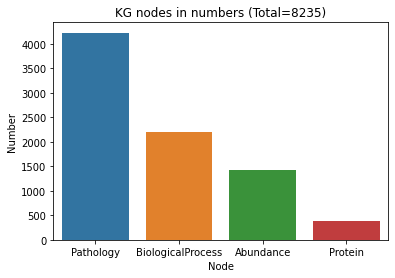

In [65]:
node_data = {'Node':['Pathology','BiologicalProcess','Abundance','Protein'],
       'Number':[4226,2195,1427,387]}
node = pd.DataFrame(node_data)
a = sns.barplot(x="Node", y="Number", data=node)
a.set(xlabel='Node',ylabel='Number',title= 'KG nodes in numbers (Total=8235)')

# Bar plots for namespace types

[Text(0.5, 0, 'Number'),
 Text(0, 0.5, 'Namespace'),
 Text(0.5, 1.0, 'KG Namespace in numbers')]

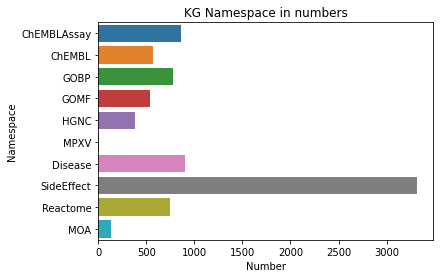

In [66]:
nspace_data = {'Namespace':['ChEMBLAssay','ChEMBL','GOBP','GOMF','HGNC','MPXV','Disease','SideEffect','Reactome','MOA'],
       'Number':[862,565,774,537,377,10,907,3319,751,133]}
nspace = pd.DataFrame(nspace_data)
a = sns.barplot(x="Number", y="Namespace", data=nspace_data)
a.set(xlabel='Number',ylabel='Namespace',title= 'KG Namespace in numbers')

# Load file from Open Targets for info about 'druggability'

In [47]:
infile = open('data/opentargets//targets.pkl','rb')
targetability = pickle.load(infile)
infile.close()

In [51]:
#Fetch human proteins from KG
protein = []
for node in mpox_graph.nodes():
    if isinstance(node,pybel.dsl.Protein):
        if node.namespace == 'HGNC':
            protein.append(node.name)
            
len(protein)

377

In [52]:
targetability = targetability[targetability['approvedSymbol'].isin(protein)]
targetability = targetability.reset_index(drop=True)

In [64]:
#targetability[targetability['approvedSymbol']=='C1R']
targetability.dropna(subset=['tractability'],inplace=True)
targetability = targetability.reset_index(drop=True)
targetability.head(5)


,id,approvedSymbol,biotype,transcriptIds,genomicLocation,alternativeGenes,approvedName,go,hallmarks,synonyms,...,obsoleteNames,constraint,tep,proteinIds,dbXrefs,chemicalProbes,homologues,tractability,safetyLiabilities,pathways
0,ENSG00000115705,TPO,protein_coding,"[ENST00000650224, ENST00000382269, ENST0000032...","{'chromosome': '2', 'start': 1374066, 'end': 1...",None,thyroid peroxidase,"[{'id': 'GO:0098869', 'source': 'GO_REF:000010...",None,"[{'label': 'Thyroid peroxidase', 'source': 'un...",...,[],"[{'constraintType': 'syn', 'score': -0.8653900...",None,"[{'id': 'P07202', 'source': 'uniprot_swissprot...","[{'id': '12015', 'source': 'HGNC'}, {'id': 'CH...",None,"[{'speciesId': '9598', 'speciesName': 'Chimpan...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...",None,"[{'pathwayId': 'R-HSA-209968', 'pathway': 'Thy..."
1,ENSG00000080824,HSP90AA1,protein_coding,"[ENST00000216281, ENST00000557089, ENST0000056...","{'chromosome': '14', 'start': 102080742, 'end'...",None,heat shock protein 90 alpha family class A mem...,"[{'id': 'GO:0005829', 'source': 'Reactome:R-HS...",None,"[{'label': 'Heat shock protein HSP 90-alpha', ...",...,"[{'label': 'heat shock 90kD protein 1, alpha',...","[{'constraintType': 'syn', 'score': -8.6224002...",None,"[{'id': 'P07900', 'source': 'uniprot_swissprot...","[{'id': '5253', 'source': 'HGNC'}, {'id': '1BY...","[{'control': None, 'drugId': 'CHEMBL467399', '...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...",None,"[{'pathwayId': 'R-HSA-9009391', 'pathway': 'Ex..."
2,ENSG00000158748,HTR6,protein_coding,[ENST00000289753],"{'chromosome': '1', 'start': 19664875, 'end': ...",None,5-hydroxytryptamine receptor 6,"[{'id': 'GO:0030425', 'source': 'PMID:21873635...",None,"[{'label': '5-hydroxytryptamine receptor 6', '...",...,[{'label': '5-hydroxytryptamine (serotonin) re...,"[{'constraintType': 'syn', 'score': -0.9145399...",None,"[{'id': 'P50406', 'source': 'uniprot_swissprot...","[{'id': '5301', 'source': 'HGNC'}, {'id': 'CHE...",None,"[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'event': 'receptor binding', 'eventId': None...","[{'pathwayId': 'R-HSA-418555', 'pathway': 'G a..."
3,ENSG00000123595,RAB9A,protein_coding,"[ENST00000464506, ENST00000618931, ENST0000024...","{'chromosome': 'X', 'start': 13689128, 'end': ...",None,"RAB9A, member RAS oncogene family","[{'id': 'GO:0042470', 'source': 'GO_REF:000002...",None,"[{'label': 'Ras-related protein Rab-9A', 'sour...",...,"[{'label': 'RAB9, member RAS oncogene family',...","[{'constraintType': 'syn', 'score': 0.95749002...",None,"[{'id': 'P51151', 'source': 'uniprot_swissprot...","[{'id': '9792', 'source': 'HGNC'}, {'id': '1WM...",None,"[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...",None,"[{'pathwayId': 'R-HSA-8873719', 'pathway': 'RA..."
4,ENSG00000170425,ADORA2B,protein_coding,"[ENST00000304222, ENST00000582124]","{'chromosome': '17', 'start': 15945130, 'end':...",None,adenosine A2b receptor,"[{'id': 'GO:0005886', 'source': 'Reactome:R-HS...",None,"[{'label': 'Adenosine receptor A2b', 'source':...",...,[],"[{'constraintType': 'syn', 'score': 0.42638000...",None,"[{'id': 'P29275', 'source': 'uniprot_swissprot'}]","[{'id': '264', 'source': 'HGNC'}, {'id': 'CHEM...","[{'control': None, 'drugId': None, 'id': 'MRS1...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'event': 'increased/decreased inflammation',...","[{'pathwayId': 'R-HSA-417973', 'pathway': 'Ade..."


# Create a file with 'druggability' label yes or no for human proteins

In [55]:
gene = []
flag = []
i = 0
#j = 0
for i in range(len(targetability)):

        
    #if pd.isna(targetability['tractability'][i].any() != True): 
    if targetability['tractability'][i][7]['value'] == True:

        gene.append(targetability['approvedSymbol'][i])
        flag.append('Yes')
        
    else:
        #print(targetability['approvedSymbol'][i])
        gene.append(targetability['approvedSymbol'][i])
        flag.append('No')

        

In [56]:
druggability = pd.DataFrame()
druggability['Gene'] = gene
druggability['Druggable Family'] = flag
druggability.to_csv('data/opentargets/druggability.csv',sep=',')

In [57]:
druggability

,Gene,Druggable Family
0,TPO,Yes
1,HSP90AA1,Yes
2,HTR6,Yes
3,RAB9A,Yes
4,ADORA2B,Yes
...,...,...
275,C4A,No
276,P2RY2,Yes
277,MEN1,No
278,IMPDH2,Yes


# Create sub-graph for Supplementary File Outline no. 3

In [60]:
def filter_graph(mainGraph, vprotList):
    nsp_list = []
    for u, v, data in mainGraph.edges(data=True):
        if u.name in vprotList or v.name in vprotList:
            nsp_list.append(u)
            nsp_list.append(v)

    #print(nsp_list)

    nsp_graph = mainGraph.subgraph(nsp_list)
    #nsp_graph = pybel.struct.mutation.induction_expansion.get_subgraph_by_second_neighbors(mpox_graph, nsp_list, filter_pathologies=False)
    return(nsp_graph)


In [61]:
query = 'p28 TK B4R Q8V4Y0 MKRN3 MKRN4P MKRN1 MKRN2 RNF8 TK1 SLFN12 SLFN12L CA3 CA13 CA5A CA1 CA2'.split(' ')


In [62]:
query_graph = filter_graph(mpox_graph,query)

In [63]:
to_jupyter(query_graph)

<IPython.core.display.Javascript object>

# Export final KG to other standard formats

In [69]:
#to cytoscape compatible graphml 
pybel.to_graphml(mpox_graph,'data/export//Monkeypox_KG_25thJuly.graphml')

#to regular BEL format
pybel.dump(mpox_graph,'data/export//Monkeypox_KG_25thJuly.bel')

#to neo4j
pybel.to_csv(mpox_graph,'data/export//Monkeypox_KG_25thJuly.csv')

#to sif
pybel.to_sif(mpox_graph,'data/export//Monkeypox_KG_25thJuly.sif')